# Twitter

In [1]:
# loading libraries
import pandas as pd
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt

import folium
from folium import Choropleth
from folium.plugins import HeatMap
from shapely.geometry import Point

import warnings 
warnings.filterwarnings("ignore")

In [2]:
# loading data from pickle
h_biden = pd.read_pickle('data/HASH_JB_TWEET_2020.pkl')
h_trump = pd.read_pickle('data/HASH_DT_TWEET_2020.pkl')

## Tweet's with hash

In [3]:
# we mark data for candidates
h_biden['hash'] = 'joebiden'
h_trump['hash'] = 'donaldtrump'

In [4]:
# we combine the data
df_hash = pd.concat([h_biden,h_trump]).reset_index()
del df_hash['index']

In [5]:
# we mark dates and days
df_hash['day_of_week'] = df_hash.created_at.apply(lambda x: x.dayofweek)
df_hash['day_name'] = df_hash.created_at.apply(lambda x: x.day_name())
df_hash['hour'] = df_hash.created_at.apply(lambda x: x.hour)
df_hash['day'] = df_hash.created_at.apply(lambda x: x.day)
df_hash['month'] = df_hash.created_at.apply(lambda x: x.month)
df_hash['month_name'] = df_hash.created_at.apply(lambda x: x.month_name())

In [6]:
# change name
df_hash.country = df_hash.country.apply(lambda x: 'United States' if x=='United States of America' else x)

In [7]:
# shape of data
df_hash.shape

(1757570, 26)

In [8]:
# columns of data
df_hash.columns

Index(['created_at', 'tweet', 'likes', 'retweet_count', 'source', 'user_id',
       'user_name', 'user_screen_name', 'user_description', 'user_join_date',
       'user_followers_count', 'user_location', 'lat', 'long', 'city',
       'country', 'continent', 'state', 'state_code', 'hash', 'day_of_week',
       'day_name', 'hour', 'day', 'month', 'month_name'],
      dtype='object')

In [9]:
# show data
df_hash.user_description[1:10]

1    Locked and loaded Meemaw. Love God, my family ...
2                                                  NaN
3                                                  NaN
4    A Silicon Valley #independent #News #Media #St...
5    YOUTUBE CHANNEL: https://t.co/EFnKm5gnvV MERCH...
6    Illinois, home of Lincoln and Reagan, used to ...
7    Free Stuff - No Fluff!  Get all kinds of FREE ...
8                                                  NaN
9                                                  NaN
Name: user_description, dtype: object

In [10]:
# how much duplicates?
df_hash.duplicated().sum()

11268

In [11]:
# drop duplicates of tweets
df_hash.drop_duplicates(inplace = True)
df_hash.reset_index(inplace = True)
df_hash.drop(['index'], axis = 1, inplace = True)

In [12]:
# how much null?
df_hash.continent.isna().sum()

950287

In [13]:
# fill NA data
df_hash.continent.fillna('Continent_NA', inplace=True)
df_hash.country.fillna('Country_NA', inplace=True)
df_hash.city.fillna('City_NA', inplace=True)
df_hash.state.fillna('State_NA', inplace=True)
df_hash.state_code.fillna('State_code_NA', inplace=True)

In [14]:
# shape of data
df_hash.shape
df_hash.to_pickle('data/df_hash.pkl')

### World map with generated tweets

In [15]:
# preparing map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
crs = {'init': 'EPSG:4326'}

In [16]:
# create temporary df and prepare data for map
tmp = df_hash[['lat', 'long', 'city', 'country', 'continent', 'state', 'state_code', 'hash']].copy()
tmp = tmp.dropna()
tmp.reset_index(inplace=True)
tmp.drop('index', axis=1, inplace=True)

tmp.lat = pd.to_numeric(tmp.lat)
tmp.long = pd.to_numeric(tmp.long)

In [18]:
# create heat map of tweets
# map_heat = folium.Map(tiles = 'Stamen Terrain', min_zoom = 2)
# df_tmp = tmp.dropna(subset = ['long', 'lat'])
# heat_map = HeatMap(data = df_tmp[['lat', 'long']])
# map_heat.add_child(heat_map)
# map_heat

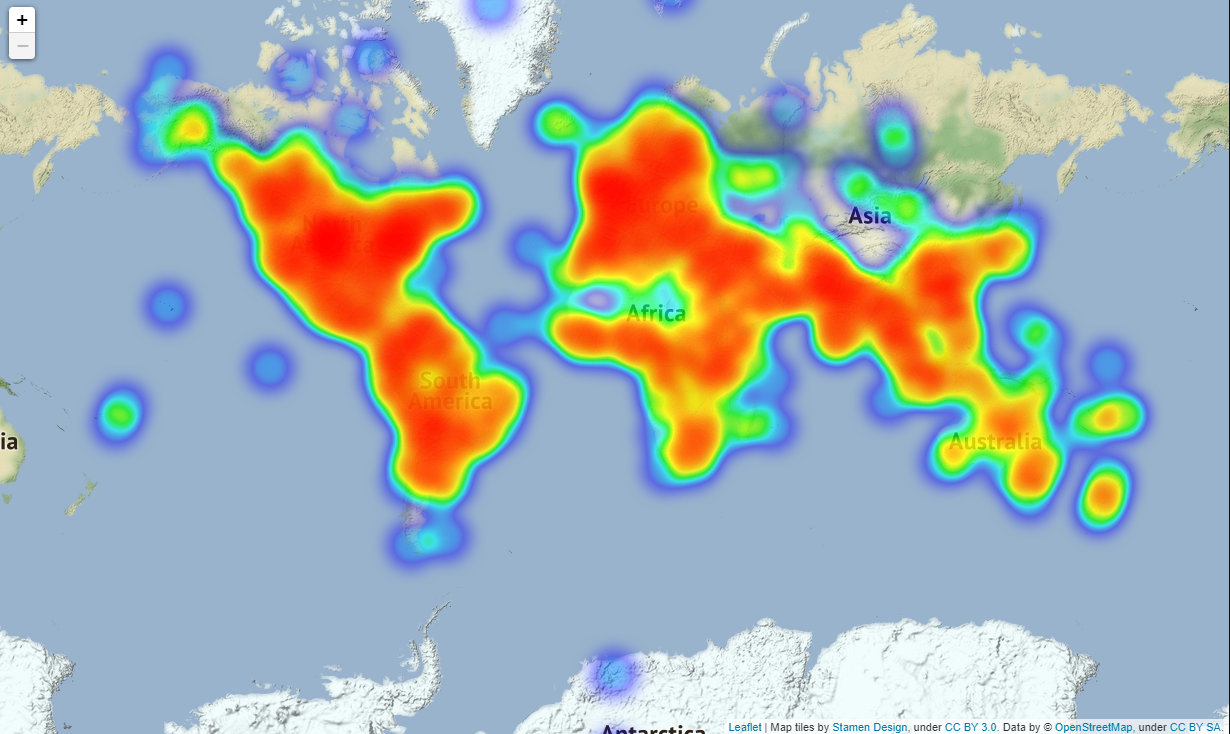

In [20]:
# the map is very big, so we load picture
from IPython.display import Image
Image('graph/heat_map.png')